<a href="https://colab.research.google.com/github/DawiSyauqi/DIF62128_A_25_2311532009_Muhammad-Dawi-Syauqi/blob/main/Praktikum3/BernoulliNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df=pd.DataFrame(dataset_dict)
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,No
1,sunny,80.0,90.0,True,No
2,overcast,83.0,78.0,False,Yes
3,rainy,70.0,96.0,False,Yes
4,rainy,68.0,80.0,False,Yes


In [51]:
df=pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind']=df['Wind'].astype(int)
df['Play']=(df['Play']=="Yes").astype(int)
df.head()


,Temperature,Humidity,Wind,Play,overcast,rainy,sunny
0,85.0,85.0,0,0,0,0,1
1,80.0,90.0,1,0,0,0,1
2,83.0,78.0,0,1,1,0,0
3,70.0,96.0,0,1,0,1,0
4,68.0,80.0,0,1,0,1,0


In [52]:
df['Temperature'] = pd.cut(df['Temperature'], bins=[0, 80, 100], labels=['Warm', 'Hot'])
df['Humidity'] = pd.cut(df['Humidity'], bins=[0, 75, 100], labels=['Dry', 'Humid'])
one_hot_columns = pd.get_dummies(df[['Temperature', 'Humidity']], drop_first=True, dtype=int)
df = df.drop(['Temperature', 'Humidity'], axis=1)
df = pd.concat([df,one_hot_columns], axis=1)
df.head()

,Wind,Play,overcast,rainy,sunny,Temperature_Hot,Humidity_Humid
0,0,0,0,0,1,1,1
1,1,0,0,0,1,0,1
2,0,1,1,0,0,1,1
3,0,1,0,1,0,0,1
4,0,1,0,1,0,0,1


In [53]:
x, y = df.drop('Play', axis=1), df['Play']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=False)


In [57]:
nb_clf = BernoulliNB()
nb_clf.fit(x_train, y_train)

y_pred = nb_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.65


In [59]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 3,  3],
       [ 4, 10]])

Text(0.5, 23.52222222222222, 'Predicted label')

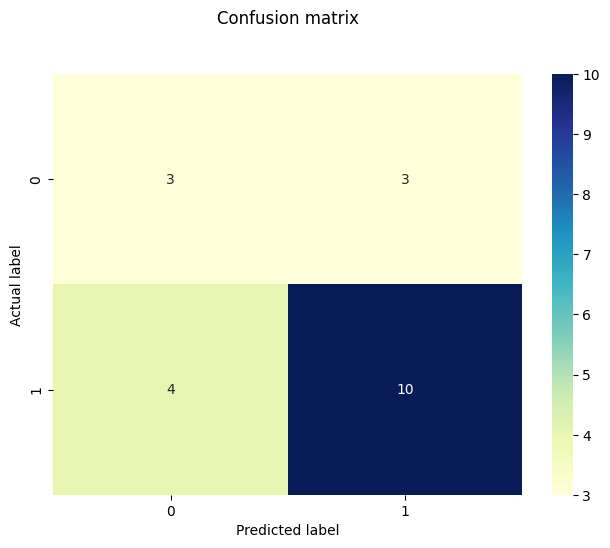

In [60]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] #name of classes
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#crete heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
from sklearn.metrics import classification_report
target_names=['without diabetes','with diabetes']
print(classification_report(y_test,y_pred,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.43      0.50      0.46         6
   with diabetes       0.77      0.71      0.74        14

        accuracy                           0.65        20
       macro avg       0.60      0.61      0.60        20
    weighted avg       0.67      0.65      0.66        20

